In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pmdarima as pm
from numpy.random import seed
from scipy import stats
import statsmodels.api as sm

In [2]:
# Avengers

In [3]:
Avenger = pd.read_csv("Avengers_Final.csv")
Avenger = Avenger[['Date', 'Units_Sold', 'Movie_Playing']]
Avenger.head()

,Date,Units_Sold,Movie_Playing
0,1997-04,120937,0
1,1997-05,107567,0
2,1997-06,114896,0
3,1997-07,110084,0
4,1997-08,114787,0


In [4]:
Avenger['Date'] = pd.to_datetime(Avenger['Date'])

In [5]:
Avenger.dtypes

Date             datetime64[ns]
Units_Sold                int64
Movie_Playing             int64
dtype: object

In [6]:
Avenger.set_index('Date', inplace=True)
Avenger.head()

,Units_Sold,Movie_Playing
Date,,
1997-04-01,120937,0
1997-05-01,107567,0
1997-06-01,114896,0
1997-07-01,110084,0
1997-08-01,114787,0


In [7]:
Avenger.index

DatetimeIndex(['1997-04-01', '1997-05-01', '1997-06-01', '1997-07-01',
               '1997-08-01', '1997-09-01', '1997-12-01', '1998-01-01',
               '1998-02-01', '1998-03-01',
               ...
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-07-01',
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', name='Date', length=376, freq=None)

In [8]:
Avengers = Avenger.resample('M').mean()
Avengers.head()

,Units_Sold,Movie_Playing
Date,,
1997-04-30,120937.0,0.0
1997-05-31,107567.0,0.0
1997-06-30,114896.0,0.0
1997-07-31,110084.0,0.0
1997-08-31,114787.0,0.0


In [9]:
Avengers.isnull().values.any()

True

In [10]:
Avengers.isnull().sum().sum()

34

In [11]:
is_NaN = Avengers.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = Avengers[row_has_NaN]
print(rows_with_NaN)

            Units_Sold  Movie_Playing
Date                                 
1997-10-31         NaN            NaN
1997-11-30         NaN            NaN
2003-07-31         NaN            NaN
2003-09-30         NaN            NaN
2004-08-31         NaN            NaN
2004-10-31         NaN            NaN
2005-05-31         NaN            NaN
2006-09-30         NaN            NaN
2007-01-31         NaN            NaN
2008-01-31         NaN            NaN
2008-11-30         NaN            NaN
2015-05-31         NaN            NaN
2015-06-30         NaN            NaN
2015-07-31         NaN            NaN
2015-08-31         NaN            NaN
2015-09-30         NaN            NaN
2017-04-30         NaN            NaN


In [12]:
Avengers = Avengers.fillna(method='ffill')

In [13]:
Avengers.isnull().values.any()

False

In [14]:
#Statistics

In [15]:
np.random.seed(47)
N_rep = 10000
#Create function to run bootstrap sampling from
def bootstrap(data, func, N_rep):
    #Create empty array 
    bootstrap_rep = np.empty(N_rep)
    #Run bootstrap replicates
    for i in range(N_rep):
        bootstrap_sample = np.random.choice(data, len(data))
        bootstrap_rep[i] = func(bootstrap_sample)
    return bootstrap_rep

In [16]:
#Assign movie and no-movie array
movie = np.array(Avengers[Avengers['Movie_Playing']==1].Units_Sold)
no_movie = np.array(Avengers[Avengers['Movie_Playing']==0].Units_Sold)
#Find difference in mean between them
difference_mean = np.mean(movie) - np.mean(no_movie)
difference_mean

-25419.198494756878

In [17]:
#Difference of 10000 replicates
bootstrap_mean = bootstrap(movie, np.mean, N_rep) - bootstrap(no_movie, np.mean, N_rep)
#95% confidence interval
conf_interval = np.percentile(bootstrap_mean,[2.5, 97.5])
conf_interval

array([-32472.72460031, -18122.61860728])

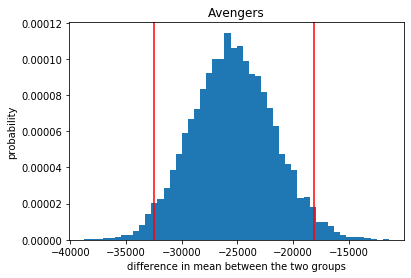

In [18]:
plt.hist(bootstrap_mean, bins=50, density=True)
plt.axvline(conf_interval[0], color='red')
plt.axvline(conf_interval[1], color='red')
plt.title("Avengers")
plt.xlabel('difference in mean between the two groups')
plt.ylabel('probability')
plt.savefig('Avengers_Stat.png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
stats.ttest_ind(movie, no_movie, equal_var = False)

Ttest_indResult(statistic=-6.769162063705015, pvalue=2.0088032024281953e-10)

In [20]:
# Linear Regression

In [21]:
#Without Movie_Playing External Predictor

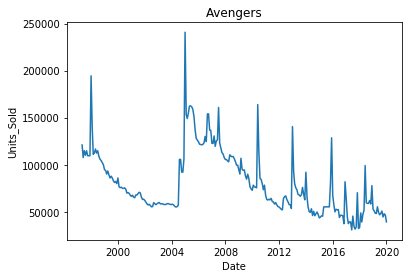

In [22]:
plt.title("Avengers")
sns.lineplot(x=Avengers.index, y=Avengers.Units_Sold, data=Avengers)
plt.savefig('Avengers_Line.png', dpi=300, bbox_inches='tight')

In [23]:
train = Avengers.loc['1997-04-30':'2015-01-31']
test= Avengers.loc['2015-02-28':]

In [24]:
train.head()

,Units_Sold,Movie_Playing
Date,,
1997-04-30,120937.0,0.0
1997-05-31,107567.0,0.0
1997-06-30,114896.0,0.0
1997-07-31,110084.0,0.0
1997-08-31,114787.0,0.0


In [25]:
test.head()

,Units_Sold,Movie_Playing
Date,,
2015-02-28,45632.000000,0.0
2015-03-31,45279.333333,0.0
2015-04-30,55192.000000,0.0
2015-05-31,55192.000000,0.0
2015-06-30,55192.000000,0.0


In [26]:
test_no_movie = Avengers[['Units_Sold']]
test_no_movie = test_no_movie.loc['2015-02-28':]
train_no_movie = Avengers[['Units_Sold']]
train_no_movie = train_no_movie.loc['1997-04-30':'2015-01-31']

In [27]:
train.shape

(214, 2)

In [28]:
test.shape

(59, 2)

In [29]:
#Find p, d, and q values to build ARIMA model
#P is the order of the Auto Regressive (AR) term or the number of lags of Y to be used as predictors
#D is the number of differencing required to make the time series stationary
#Q is the order of the Moving Average (MA) term or the number of lagged forecast errors that should go into the ARIMA model

In [30]:
#ARIMA

In [31]:
#Auto ARIMA Forecast to choose best p,d,q
model_train_arima = pm.auto_arima(train[['Units_Sold']], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True,
                      stepwise=True)

print(model_train_arima.summary())

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=4754.486, BIC=4767.931, Time=0.059 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=4784.212, BIC=4790.935, Time=0.010 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=4765.582, BIC=4775.665, Time=0.029 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=4754.258, BIC=4764.342, Time=0.024 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=4782.299, BIC=4785.661, Time=0.009 seconds
Fit ARIMA(0,1,2)x(0,0,0,0) [intercept=True]; AIC=4755.575, BIC=4769.020, Time=0.042 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=4757.314, BIC=4774.120, Time=0.104 seconds
Total fit time: 0.290 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  214
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2374.129
Date:                Thu, 06 Aug 2020   AIC  

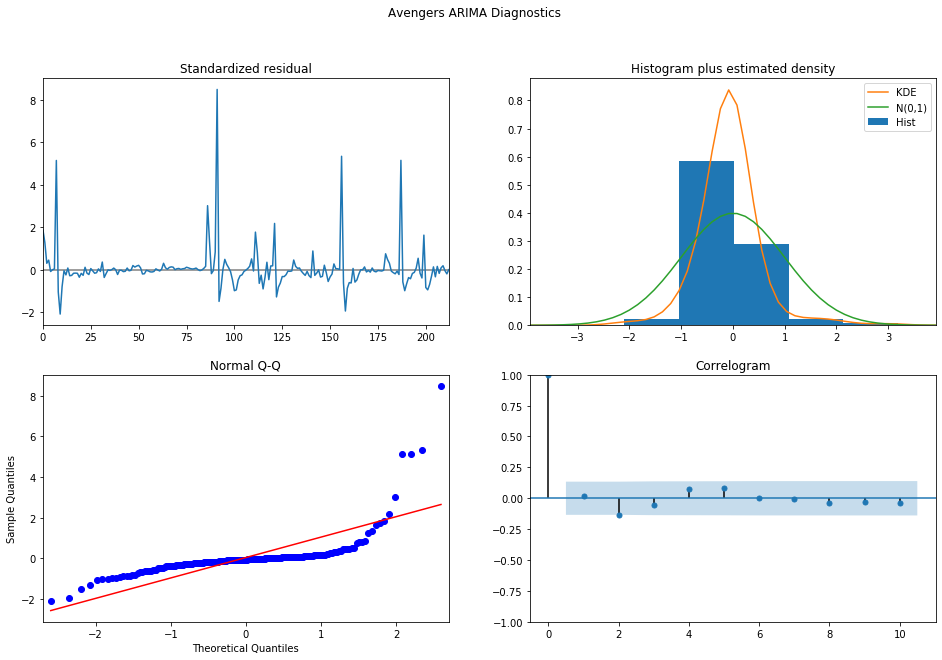

In [32]:
model_train_arima.plot_diagnostics(figsize=(16,10))
plt.suptitle("Avengers ARIMA Diagnostics")
plt.savefig('Avengers_Diag_ARIMA.png', dpi=300, bbox_inches='tight')
plt.show()

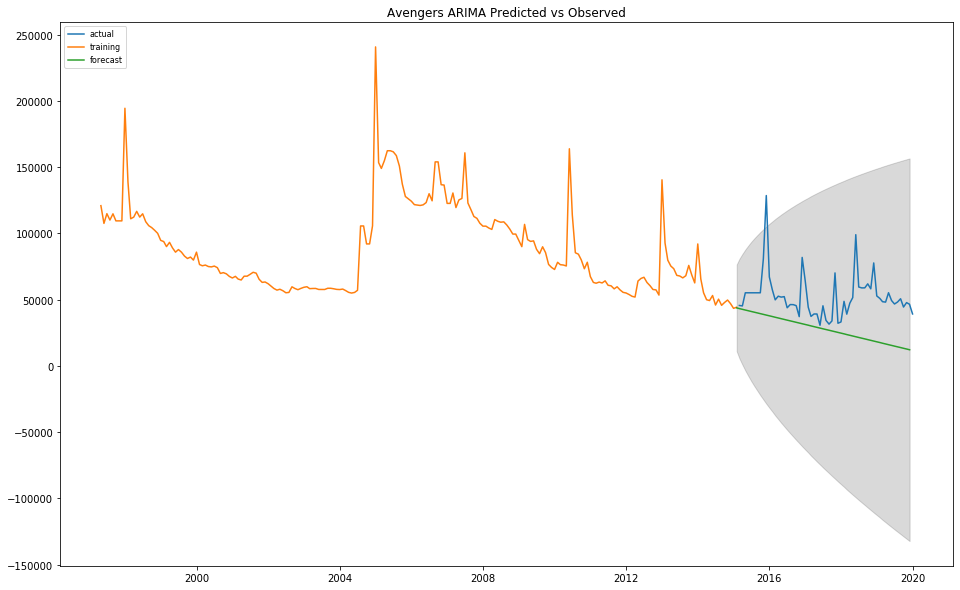

In [33]:
# Forecast
n_periods_arima = 59
fc_arima, confint_arima = model_train_arima.predict(n_periods=n_periods_arima, return_conf_int=True)
index_of_fc_arima = pd.date_range(train.index[-1], periods = n_periods_arima, freq='MS')

# make series for plotting purpose
fc_series_arima = pd.Series(fc_arima, index=index_of_fc_arima)
lower_series_arima = pd.Series(confint_arima[:, 0], index=index_of_fc_arima)
upper_series_arima = pd.Series(confint_arima[:, 1], index=index_of_fc_arima)

# Plot
plt.figure(figsize=(16,10))
plt.plot(test_no_movie, label='actual')
plt.plot(train_no_movie, label='training')
plt.plot(fc_series_arima, label='forecast')
plt.fill_between(lower_series_arima.index, lower_series_arima, upper_series_arima, color='k', alpha=.15)
plt.title("Avengers ARIMA Predicted vs Observed")
plt.legend(loc='upper left', fontsize=8)
plt.savefig('Avengers_Predict_ARIMA.png', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [35]:
mean_absolute_percentage_error(test_no_movie, fc_series_arima)

44.11303175551301

In [36]:
#SARIMA

In [37]:
#Auto SARIMA Forecast to choose best p,d,q
model_train_sarima = pm.auto_arima(train[['Units_Sold']], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True,
                      stepwise=True)

print(model_train_sarima.summary())

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,12) [intercept=True]; AIC=4567.448, BIC=4583.990, Time=0.550 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=True]; AIC=4774.322, BIC=4780.938, Time=0.036 seconds
Fit ARIMA(1,0,0)x(1,1,0,12) [intercept=True]; AIC=4599.537, BIC=4612.770, Time=0.320 seconds
Fit ARIMA(0,0,1)x(0,1,1,12) [intercept=True]; AIC=4680.585, BIC=4693.818, Time=0.364 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=False]; AIC=4776.192, BIC=4779.500, Time=0.025 seconds
Fit ARIMA(1,0,1)x(0,1,0,12) [intercept=True]; AIC=4636.855, BIC=4650.088, Time=0.199 seconds
Fit ARIMA(1,0,1)x(1,1,1,12) [intercept=True]; AIC=4568.559, BIC=4588.408, Time=0.717 seconds
Fit ARIMA(1,0,1)x(0,1,2,12) [intercept=True]; AIC=4569.396, BIC=4589.245, Time=2.374 seconds
Fit ARIMA(1,0,1)x(1,1,0,12) [intercept=True]; AIC=4588.677, BIC=4605.218, Time=0.488 seconds
Fit ARIMA(1,0,1)x(1,1,2,12) [intercept=True]; AIC=4563.845, BIC=4587.002, Time=6.365 seconds
Near non-invertible roots 

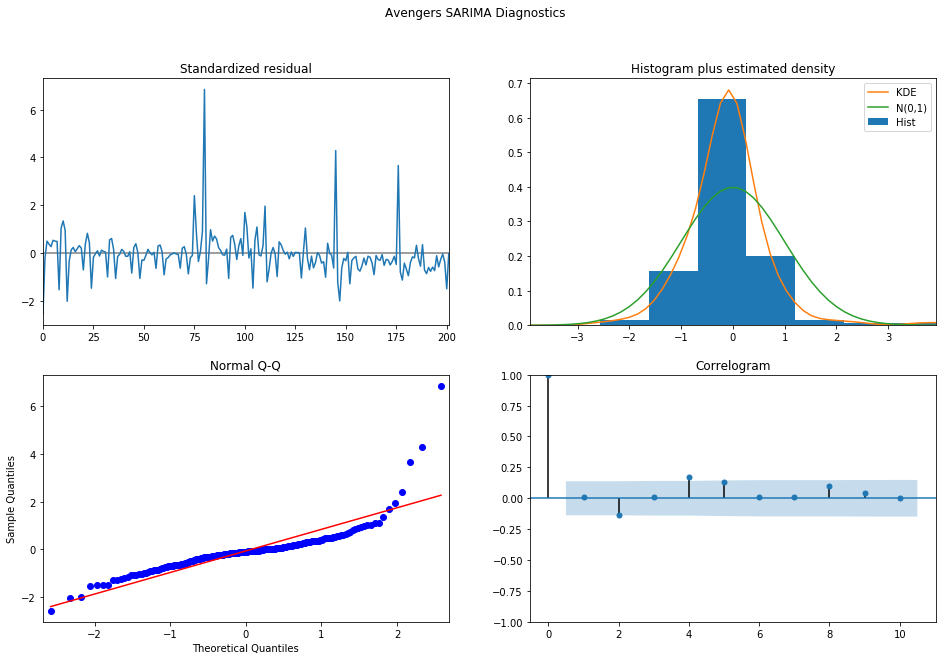

In [38]:
model_train_sarima.plot_diagnostics(figsize=(16,10))
plt.suptitle("Avengers SARIMA Diagnostics")
plt.savefig('Avengers_Diag_SARIMA.png', dpi=300, bbox_inches='tight')
plt.show()

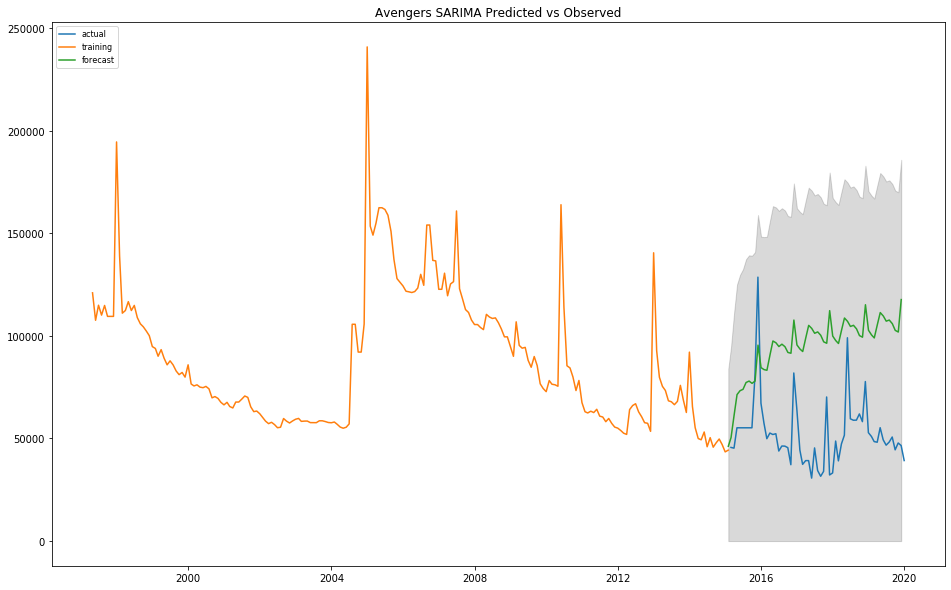

In [39]:
# Forecast
n_periods_sarima = 59
fc_sarima, confint_sarima = model_train_sarima.predict(n_periods=n_periods_sarima, return_conf_int=True)
index_of_fc_sarima = pd.date_range(train.index[-1], periods = n_periods_sarima, freq='MS')

# make series for plotting purpose
fc_series_sarima = pd.Series(fc_sarima, index=index_of_fc_sarima)
lower_series_sarima = pd.Series(confint_sarima[:, 0], index=index_of_fc_sarima)
upper_series_sarima = pd.Series(confint_sarima[:, 1], index=index_of_fc_sarima)

# Plot
plt.figure(figsize=(16,10))
plt.plot(test_no_movie, label='actual')
plt.plot(train_no_movie, label='training')
plt.plot(fc_series_sarima, label='forecast')
plt.fill_between(upper_series_sarima.index, upper_series_sarima, color='k', alpha=.15)
plt.title("Avengers SARIMA Predicted vs Observed")
plt.legend(loc='upper left', fontsize=8)
plt.savefig('Avengers_Predict_SARIMA.png', dpi=300, bbox_inches='tight')
plt.show()

In [40]:
mean_absolute_percentage_error(test_no_movie, fc_series_sarima)

96.5854131763795

In [41]:
# With Movie_Playing External Predictor

In [42]:
#SARIMAX

In [43]:
#Auto SARIMAX Forecast to choose best p,d,q
model_train_sarimax = pm.auto_arima(train[['Units_Sold']], exogenous=train[['Movie_Playing']], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True,
                      stepwise=True)

print(model_train_sarimax.summary())

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,12) [intercept=True]; AIC=4570.391, BIC=4590.241, Time=0.725 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=True]; AIC=4776.315, BIC=4786.240, Time=0.061 seconds
Fit ARIMA(1,0,0)x(1,1,0,12) [intercept=True]; AIC=4602.132, BIC=4618.674, Time=0.414 seconds
Fit ARIMA(0,0,1)x(0,1,1,12) [intercept=True]; AIC=4665.610, BIC=4682.151, Time=1.099 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=False]; AIC=5648.934, BIC=5655.550, Time=0.050 seconds
Fit ARIMA(1,0,1)x(0,1,0,12) [intercept=True]; AIC=4640.121, BIC=4656.662, Time=0.239 seconds
Fit ARIMA(1,0,1)x(1,1,1,12) [intercept=True]; AIC=4571.463, BIC=4594.621, Time=0.853 seconds
Fit ARIMA(1,0,1)x(0,1,2,12) [intercept=True]; AIC=4572.322, BIC=4595.480, Time=2.356 seconds
Fit ARIMA(1,0,1)x(1,1,0,12) [intercept=True]; AIC=4591.333, BIC=4611.183, Time=0.603 seconds
Fit ARIMA(1,0,1)x(1,1,2,12) [intercept=True]; AIC=4566.932, BIC=4593.398, Time=5.202 seconds
Near non-invertible roots 

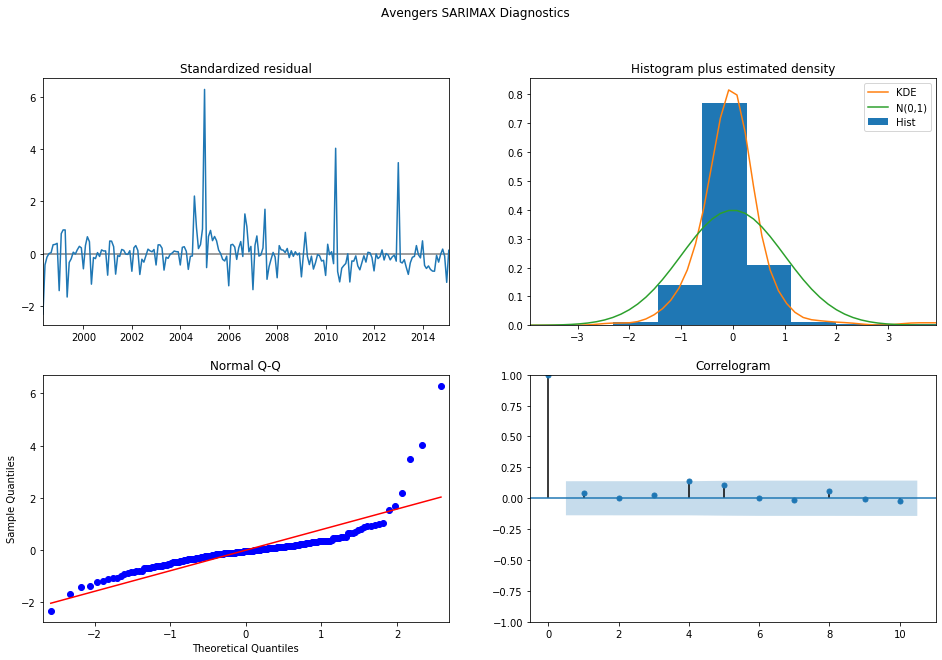

In [44]:
model_train_sarimax.plot_diagnostics(figsize=(16,10))
plt.suptitle("Avengers SARIMAX Diagnostics")
plt.savefig('Avengers_Diag_SARIMAX.png', dpi=300, bbox_inches='tight')
plt.show()

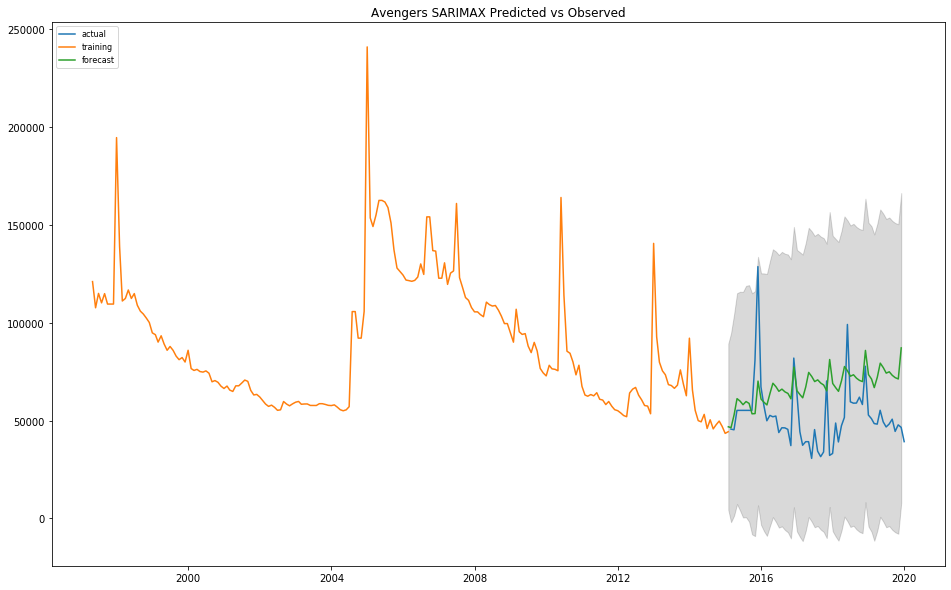

In [45]:
# Forecast
n_periods_sarimax = 59
fc_sarimax, confint_sarimax = model_train_sarimax.predict(n_periods=n_periods_sarimax, exogenous=test[['Movie_Playing']], 
                                                          return_conf_int=True)
index_of_fc_sarimax = pd.date_range(train.index[-1], periods = n_periods_sarimax, freq='MS')

# make series for plotting purpose
fc_series_sarimax = pd.Series(fc_sarimax, index=index_of_fc_sarimax)
lower_series_sarimax = pd.Series(confint_sarimax[:, 0], index=index_of_fc_sarimax)
upper_series_sarimax = pd.Series(confint_sarimax[:, 1], index=index_of_fc_sarimax)

# Plot
plt.figure(figsize=(16,10))
plt.plot(test[['Units_Sold']], label='actual')
plt.plot(train[['Units_Sold']], label='training')
plt.plot(fc_series_sarimax, label='forecast')
plt.fill_between(lower_series_sarimax.index, lower_series_sarimax, upper_series_sarimax, color='k', alpha=.15)
plt.title("Avengers SARIMAX Predicted vs Observed")
plt.legend(loc='upper left', fontsize=8)
plt.savefig('Avengers_Predict_SARIMAX.png', dpi=300, bbox_inches='tight')
plt.show()

In [46]:
mean_absolute_percentage_error(test_no_movie, fc_series_sarimax)

43.8899474994011